<a href="https://colab.research.google.com/github/sukhmanjit-singh/Parameter-Optimisation-SVM/blob/main/102003484.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler


In [17]:
df= pd.read_csv('winequality-red.csv')

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
scaler = StandardScaler()
numerical_cols = ['fixed acidity','volatile acidity','citric acid',	'residual sugar',	'chlorides','free sulfur dioxide',	'total sulfur dioxide','density',	'pH','sulphates','alcohol']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [21]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5


In [22]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:5000, :-1], df.iloc[:5000, -1], test_size=0.3)
    samples.append((X_train, X_test, y_train, y_test))

In [23]:
samples

[(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
  915        0.161077         -1.188917     0.662546       -0.240375  -0.179946   
  746       -0.068735         -1.049255     0.559845       -0.027532  -0.158692   
  898       -0.011282         -1.216849     0.611196       -0.098479  -0.201199   
  791        0.275983          0.626688    -0.518514        0.256260  -0.073677   
  133       -0.987984         -0.155419    -1.340122       -0.737010  -0.583766   
  ...             ...               ...          ...             ...        ...   
  829       -1.390155          0.459094    -0.980669       -0.311323  -0.349975   
  36        -0.298547          0.403229    -0.672566       -0.098479  -0.031169   
  837       -0.930531         -1.384443     0.046341       -0.098479  -1.603945   
  1088       1.884668         -0.658202     1.381453       -0.737010   0.160114   
  1344       1.827215         -0.602337     1.073350        0.043416  -0.222453   
  
 

In [24]:
def fitnessfunction(X_train, X_test, y_train, y_test, kernel, c, gamma):
    model= svm.SVC( C= c, kernel= kernel, gamma=gamma)
    model.fit(X_train, y_train)
    print("fit")
    predicted = model.predict(X_test)
        
    # Model Evaluation Accuracy
    accuracy = round(np.mean(y_test == predicted) * 100, 2)
    return accuracy 
    

In [37]:
# divide dataset into training and testing sets with 10 different samples


nsamples = 10
accuracies = []
params= []
iteration= 1000

kernelList = ['linear', 'rbf', 'sigmoid']
df_sample= pd.DataFrame(columns=['sample#', 'best accuracy', 'c', 'gamma', 'kernel'])

for i in range(nsamples):
    bestC = 0 
    bestGamma = 0 
    bestAccuracy=0
    X_train, X_test, y_train, y_test = samples[i]
    
    print("Iterating on sample ", i+1)
    for j in range(1, iteration+1):
        print("iteration ",j)
        kernel= np.random.choice(kernelList)
        C = np.random.uniform(0,10)
        gamma = np.random.uniform(0, 10)
        print(kernel , C, gamma)
        accuracy= fitnessfunction(X_train, X_test, y_train, y_test, kernel, C, gamma)
        if accuracy > bestAccuracy:
                bestAccuracy = accuracy
                bestC= C
                bestGamma= gamma
                bestKernel= kernel

                    
    accuracies.append(bestAccuracy)
    params.append([bestC, bestGamma, bestKernel])

    df_sample.loc[len(df_sample.index)] = [i+1, bestAccuracy, bestC, bestGamma, bestKernel]
    #print(f"Sample {i+1}: Best accuracy = {bestAccuracy}, Best params = {bestNu, bestEpsilon, bestKernel}")
print("Done iterating!\n")

Iterating on sample  1
iteration  1
linear 6.921387286703247 0.8803230962901765
fit
iteration  2
rbf 9.389169184422823 2.7524074618627714
fit
iteration  3
rbf 5.109893083339717 2.1419286052063025
fit
iteration  4
rbf 9.37169116159042 0.7514491980098825
fit
iteration  5
sigmoid 4.802946048880465 0.7155520218206057
fit
iteration  6
sigmoid 6.659842153406299 4.59792529265962
fit
iteration  7
sigmoid 8.248747373881418 6.351476804328602
fit
iteration  8
rbf 6.373968009544364 5.48433460099079
fit
iteration  9
rbf 1.6311488298135368 7.635060302122327
fit
iteration  10
linear 3.151660544338255 0.6265529175228812
fit
iteration  11
rbf 5.298343961350987 9.445904215405228
fit
iteration  12
linear 9.692094089615113 3.8583195480003885
fit
iteration  13
sigmoid 7.858493458968418 5.315953325092311
fit
iteration  14
rbf 5.806382079428769 3.324872724010249
fit
iteration  15
sigmoid 8.57907664736642 0.6464085874438619
fit
iteration  16
rbf 3.737158149272206 3.2305858832475542
fit
iteration  17
rbf 1.795

In [38]:
print(df_sample)

   sample#  best accuracy         c     gamma kernel
0        1          65.62  3.180682  0.748726    rbf
1        2          63.54  2.506094  0.769998    rbf
2        3          65.42  3.732061  1.105737    rbf
3        4          65.83  2.039786  0.645578    rbf
4        5          62.71  6.933921  2.287723    rbf
5        6          63.54  2.517882  0.752477    rbf
6        7          62.92  1.961003  0.854970    rbf
7        8          61.25  6.888056  1.227083    rbf
8        9          62.71  1.961777  0.503705    rbf
9       10          66.25  4.967958  0.311632    rbf


In [39]:
X_train, X_test, y_train, y_test = samples[df_sample['best accuracy'].idxmax()]


In [40]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC


train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=df_sample['kernel'].iloc[df_sample['best accuracy'].idxmax()], 
                                                        C=df_sample['c'].iloc[df_sample['best accuracy'].idxmax()],
                                                        gamma=df_sample['gamma'].iloc[df_sample['best accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


In [42]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

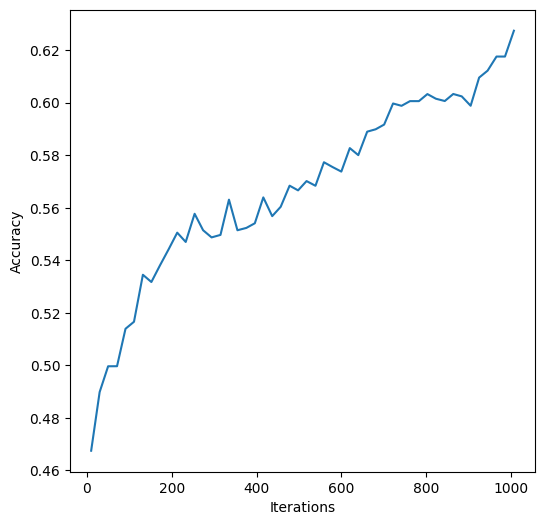

In [43]:
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, test_mean)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()